# Predict Customer Churn
* start date: 20.06.24

> 고객 데이터에 관심이 많다. 특히 고객 이탈에 대해 공부를 해보고 싶었는데, Kaggle에 공개된 데이터셋이 존재했다.

* 목표: 통신사 도메인의 고객 데이터를 활용한 고객 이탈 예측 모델 생성
* 데이터셋: [캐글 데이터셋](https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-불러오기" data-toc-modified-id="1.-데이터-불러오기-1">1. 데이터 불러오기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2">2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2.1-컬럼명-변경" data-toc-modified-id="2.1-컬럼명-변경-2.1">2.1 컬럼명 변경</a></span></li><li><span><a href="#2.2-이진-텍스트-데이터-숫자로-변경" data-toc-modified-id="2.2-이진-텍스트-데이터-숫자로-변경-2.2">2.2 이진 텍스트 데이터 숫자로 변경</a></span></li><li><span><a href="#2.3-Totalcharges-컬럼" data-toc-modified-id="2.3-Totalcharges-컬럼-2.3">2.3 Totalcharges 컬럼</a></span></li></ul></li><li><span><a href="#3.-데이터-살펴보기" data-toc-modified-id="3.-데이터-살펴보기-3">3. 데이터 살펴보기</a></span><ul class="toc-item"><li><span><a href="#3.1-Gender" data-toc-modified-id="3.1-Gender-3.1">3.1 Gender</a></span></li><li><span><a href="#3.2-Demographic" data-toc-modified-id="3.2-Demographic-3.2">3.2 Demographic</a></span></li><li><span><a href="#3.3-Tenure" data-toc-modified-id="3.3-Tenure-3.3">3.3 Tenure</a></span></li><li><span><a href="#3.4-Services-&amp;-contracts" data-toc-modified-id="3.4-Services-&amp;-contracts-3.4">3.4 Services &amp; contracts</a></span></li><li><span><a href="#3.5-Charges" data-toc-modified-id="3.5-Charges-3.5">3.5 Charges</a></span></li><li><span><a href="#3.6-Correlation" data-toc-modified-id="3.6-Correlation-3.6">3.6 Correlation</a></span></li></ul></li><li><span><a href="#4.-Feature-Engineering" data-toc-modified-id="4.-Feature-Engineering-4">4. Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#4.1-Scaling" data-toc-modified-id="4.1-Scaling-4.1">4.1 Scaling</a></span></li><li><span><a href="#4.2-One_hot_encoding" data-toc-modified-id="4.2-One_hot_encoding-4.2">4.2 One_hot_encoding</a></span></li></ul></li><li><span><a href="#5.-Modeling" data-toc-modified-id="5.-Modeling-5">5. Modeling</a></span><ul class="toc-item"><li><span><a href="#4.3-Feature-selection" data-toc-modified-id="4.3-Feature-selection-5.1">4.3 Feature selection</a></span></li></ul></li></ul></div>

## 1. 데이터 불러오기

In [64]:
import pandas as pd
pd.set_option('display.max_columns', 30)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import missingno as msno
from tqdm import tqdm_notebook

In [65]:
plt.rc('font', size=13)
plt.rc('font', family='NanumGothic')

In [3]:
df = pd.read_csv('source/Telco_Customer/Telco_Customer_Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


* object 형식의 컬럼이 많은데, 대부분 No, Yes 형식의 binary text가 많다.
    * 이 컬럼들은 전처리 시 [0, 1]로 변경하자.
* 그리고, 컬럼명이 어떤 것은 카멜표기법이고, 어떤것은 그냥 소문자 표기법이다.
    * 오타도 줄일 겸, 모두 소문자로 컬럼명을 변경해버리자.

## 2. 데이터 전처리

### 2.1 컬럼명 변경
* 소문자로 변경하자

In [8]:
col_lower = [col.lower() for col in df.columns]
col_lower

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [9]:
df.columns = col_lower
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### 2.2 이진 텍스트 데이터 숫자로 변경

In [10]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
cols = ['partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
        'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 
        'paperlessbilling', 'churn']
for col in cols:
    print('{:<17}: {}'.format(col, df[col].unique()))

partner          : ['Yes' 'No']
dependents       : ['No' 'Yes']
phoneservice     : ['No' 'Yes']
multiplelines    : ['No phone service' 'No' 'Yes']
onlinesecurity   : ['No' 'Yes' 'No internet service']
onlinebackup     : ['Yes' 'No' 'No internet service']
deviceprotection : ['No' 'Yes' 'No internet service']
techsupport      : ['No' 'Yes' 'No internet service']
streamingtv      : ['No' 'Yes' 'No internet service']
streamingmovies  : ['No' 'Yes' 'No internet service']
paperlessbilling : ['Yes' 'No']
churn            : ['No' 'Yes']


* ['No' 'Yes' 'No internet service']는 ['No', 'Yes']로 변경해주고,
* No: 0과 Yes: 1로 변경해주자

In [12]:
for col in cols:
    df[col].replace({'No': 0,
                     'No internet service': 0,
                     'No phone service': 0,
                     'Yes': 1}, inplace=True)

In [13]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerid          7043 non-null object
gender              7043 non-null object
seniorcitizen       7043 non-null int64
partner             7043 non-null int64
dependents          7043 non-null int64
tenure              7043 non-null int64
phoneservice        7043 non-null int64
multiplelines       7043 non-null int64
internetservice     7043 non-null object
onlinesecurity      7043 non-null int64
onlinebackup        7043 non-null int64
deviceprotection    7043 non-null int64
techsupport         7043 non-null int64
streamingtv         7043 non-null int64
streamingmovies     7043 non-null int64
contract            7043 non-null object
paperlessbilling    7043 non-null int64
paymentmethod       7043 non-null object
monthlycharges      7043 non-null float64
totalcharges        7043 non-null object
churn               7043 non-null int64
dtypes: float64(1), int64(14), object(6)
memo

### 2.3 Totalcharges 컬럼
* 해당 컬럼이 object로 되어있는 것을 보아, 컬럼 내 문자가 포함되어있나보다.

In [15]:
df.totalcharges.value_counts().sort_index()[:5]

          11
100.2      1
100.25     1
100.35     1
100.4      1
Name: totalcharges, dtype: int64

* 공백문자가 껴있다. 해당 레코드를 확인해보자.

In [16]:
df[df.totalcharges==' ']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,,0


* 총 11개로 적기때문에, 해당 레코드들은 삭제해주자.

In [17]:
df = df[df['totalcharges'] != ' ']
df.totalcharges = df.totalcharges.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerid          7032 non-null object
gender              7032 non-null object
seniorcitizen       7032 non-null int64
partner             7032 non-null int64
dependents          7032 non-null int64
tenure              7032 non-null int64
phoneservice        7032 non-null int64
multiplelines       7032 non-null int64
internetservice     7032 non-null object
onlinesecurity      7032 non-null int64
onlinebackup        7032 non-null int64
deviceprotection    7032 non-null int64
techsupport         7032 non-null int64
streamingtv         7032 non-null int64
streamingmovies     7032 non-null int64
contract            7032 non-null object
paperlessbilling    7032 non-null int64
paymentmethod       7032 non-null object
monthlycharges      7032 non-null float64
totalcharges        7032 non-null float64
churn               7032 non-null int64
dtypes: float64(2), int64(14), object(5)
mem

* 처리 완료!

## 3. 데이터 살펴보기
* EDA전에, test 세트는 미리 구분하여 들여다보지 않기

In [18]:
df_train, df_test = train_test_split(df)

In [19]:
print(df_train.shape, df_test.shape)

(5274, 21) (1758, 21)


In [20]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2930,5322-ZSMZY,Male,0,1,1,31,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,755.60,0
2190,5003-XZWWO,Male,0,1,0,71,1,1,DSL,0,1,1,1,1,1,Two year,0,Credit card (automatic),84.20,5956.85,0
1705,4918-FYJNT,Female,1,1,0,55,1,1,Fiber optic,0,1,1,1,0,0,Month-to-month,0,Electronic check,90.45,5044.80,0
1323,4565-NLZBV,Female,0,1,0,71,1,1,No,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),24.65,1710.15,0
6209,3417-TSCIC,Male,0,0,0,29,0,0,DSL,0,0,0,0,0,0,One year,1,Mailed check,24.85,788.05,0


### 3.1 Gender

Male ratio: 50.13%, Female ratio: 49.87%


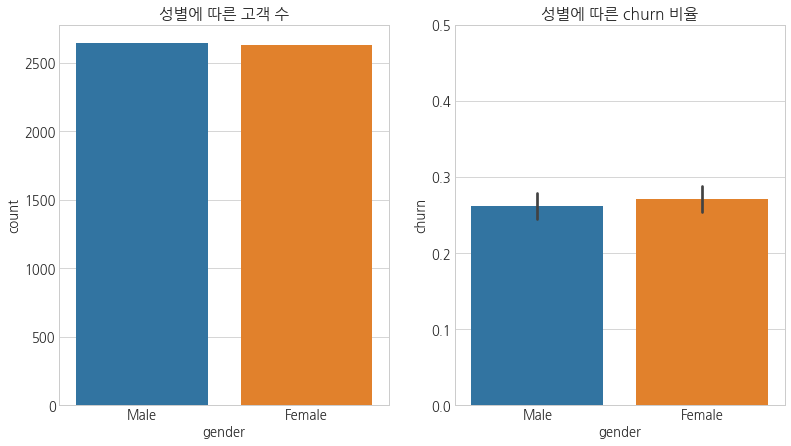

In [21]:
df_male = df_train[df_train.gender=='Male']
df_female = df_train[df_train.gender=='Female']

f, ax = plt.subplots(1, 2, figsize=(13, 7))
sns.countplot(df_train.gender, ax=ax[0])
ax[0].set_title('성별에 따른 고객 수')
sns.barplot('gender', 'churn', data=df_train, ax=ax[1])
ax[1].set_title('성별에 따른 churn 비율')
ax[1].set_ylim(0, 0.5)
print('Male ratio: {:.2f}%, Female ratio: {:.2f}%'.format(len(df_male) / len(df_train)*100,
                                                          len(df_female) / len(df_train)*100))

* 데이터셋 내 성비는 밸런스가 잘 맞는다.
    * 성별에 따라 churn 비율의 차이는 또한 적다.

### 3.2 Demographic
* seniorcitizen, partner, dependents	

In [22]:
def cplot(data, col, ax):
    sns.countplot(data[col], ax=ax)
    ax.set_title('{} ({:.2f}%)'.format(col, data[col].mean()*100))

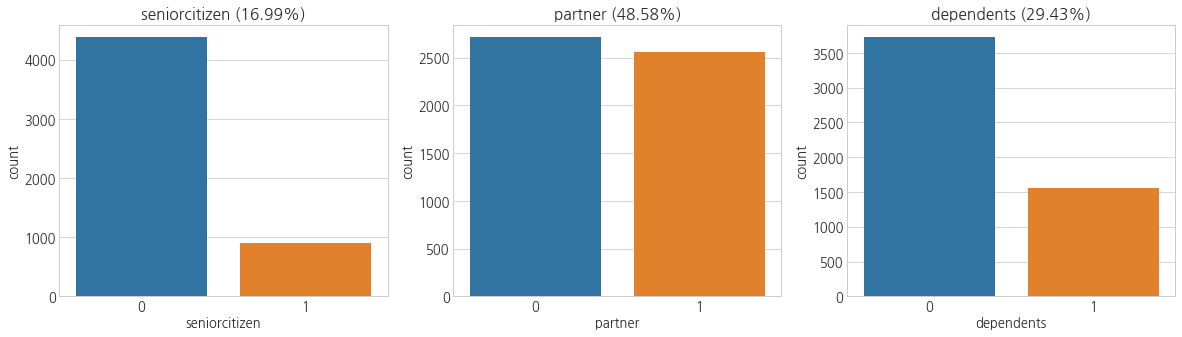

In [23]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
cplot(df_train, 'seniorcitizen', ax[0])
cplot(df_train, 'partner', ax[1])
cplot(df_train, 'dependents', ax[2])

* 시니어의 비율은 약 16%를 차지하고,
* 배우자가 있는 사람은 48%,
* 자식이 있는 곳은 30%를 차지한다.
* 이제 여기에 churn을 함께 살펴보자.

In [24]:
def churnplot(data, col, ax):
    sns.countplot(col, hue='churn', data=data, ax=ax)
    ax.set_title('{} (0: {:.2f}%, 1: {:.2f}%)'.format(
    col,
    data[data[col] == 0].churn.mean()*100, 
    data[data[col] == 1].churn.mean()*100))

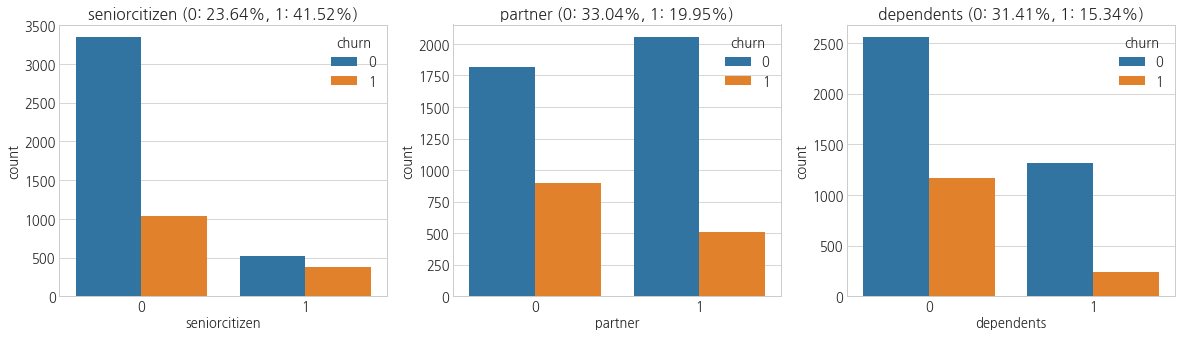

In [25]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
churnplot(df_train, 'seniorcitizen', ax[0])
churnplot(df_train, 'partner', ax[1])
churnplot(df_train, 'dependents', ax[2])

* 시니어일 경우, churn rate가 높다.
* 배우자나 자식이 있는 경우에는 churn rate가 상대적으로 낮다.

### 3.3 Tenure
* 계약 기간과 chunrate간의 관계를 파악해보자.

In [26]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2930,5322-ZSMZY,Male,0,1,1,31,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,755.60,0
2190,5003-XZWWO,Male,0,1,0,71,1,1,DSL,0,1,1,1,1,1,Two year,0,Credit card (automatic),84.20,5956.85,0
1705,4918-FYJNT,Female,1,1,0,55,1,1,Fiber optic,0,1,1,1,0,0,Month-to-month,0,Electronic check,90.45,5044.80,0
1323,4565-NLZBV,Female,0,1,0,71,1,1,No,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),24.65,1710.15,0
6209,3417-TSCIC,Male,0,0,0,29,0,0,DSL,0,0,0,0,0,0,One year,1,Mailed check,24.85,788.05,0


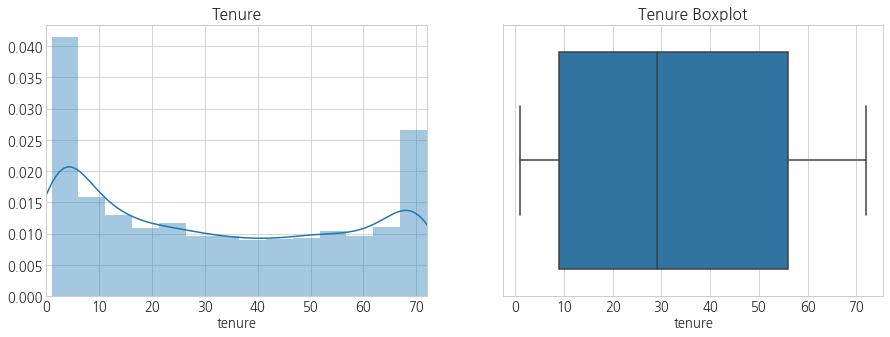

In [27]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_train.tenure, ax=ax[0])
ax[0].set_title('Tenure')
ax[0].set_xlim(0, max(df_train.tenure))

sns.boxplot(df_train.tenure, ax=ax[1])
ax[1].set_title('Tenure Boxplot')
plt.show()

* 쌍봉우리 형태를 보인다. 
* churn 유무로 나눠 살펴보자.

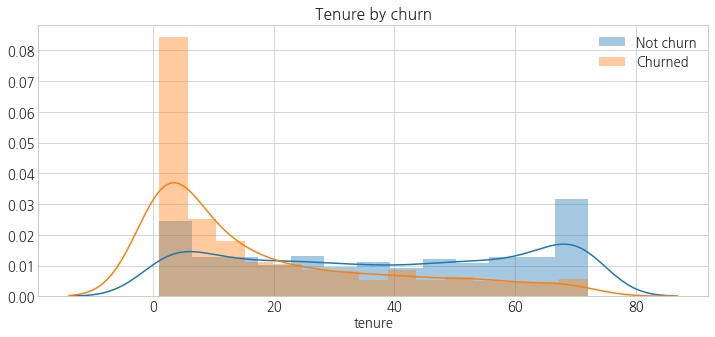

In [28]:
plt.figure(figsize=(12, 5))
sns.distplot(df_train[df_train.churn==0].tenure, label='Not churn')
sns.distplot(df_train[df_train.churn==1].tenure, label='Churned')
plt.legend()
plt.title('Tenure by churn')
plt.show()

* 이탈 고객의 경우 계약 기간이 짧은 것을 확인할 수 있다.

### 3.4 Services & contracts
* phoneservice, multiplelines, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, paperlessbilling, contract(cat), internetservice(cat)

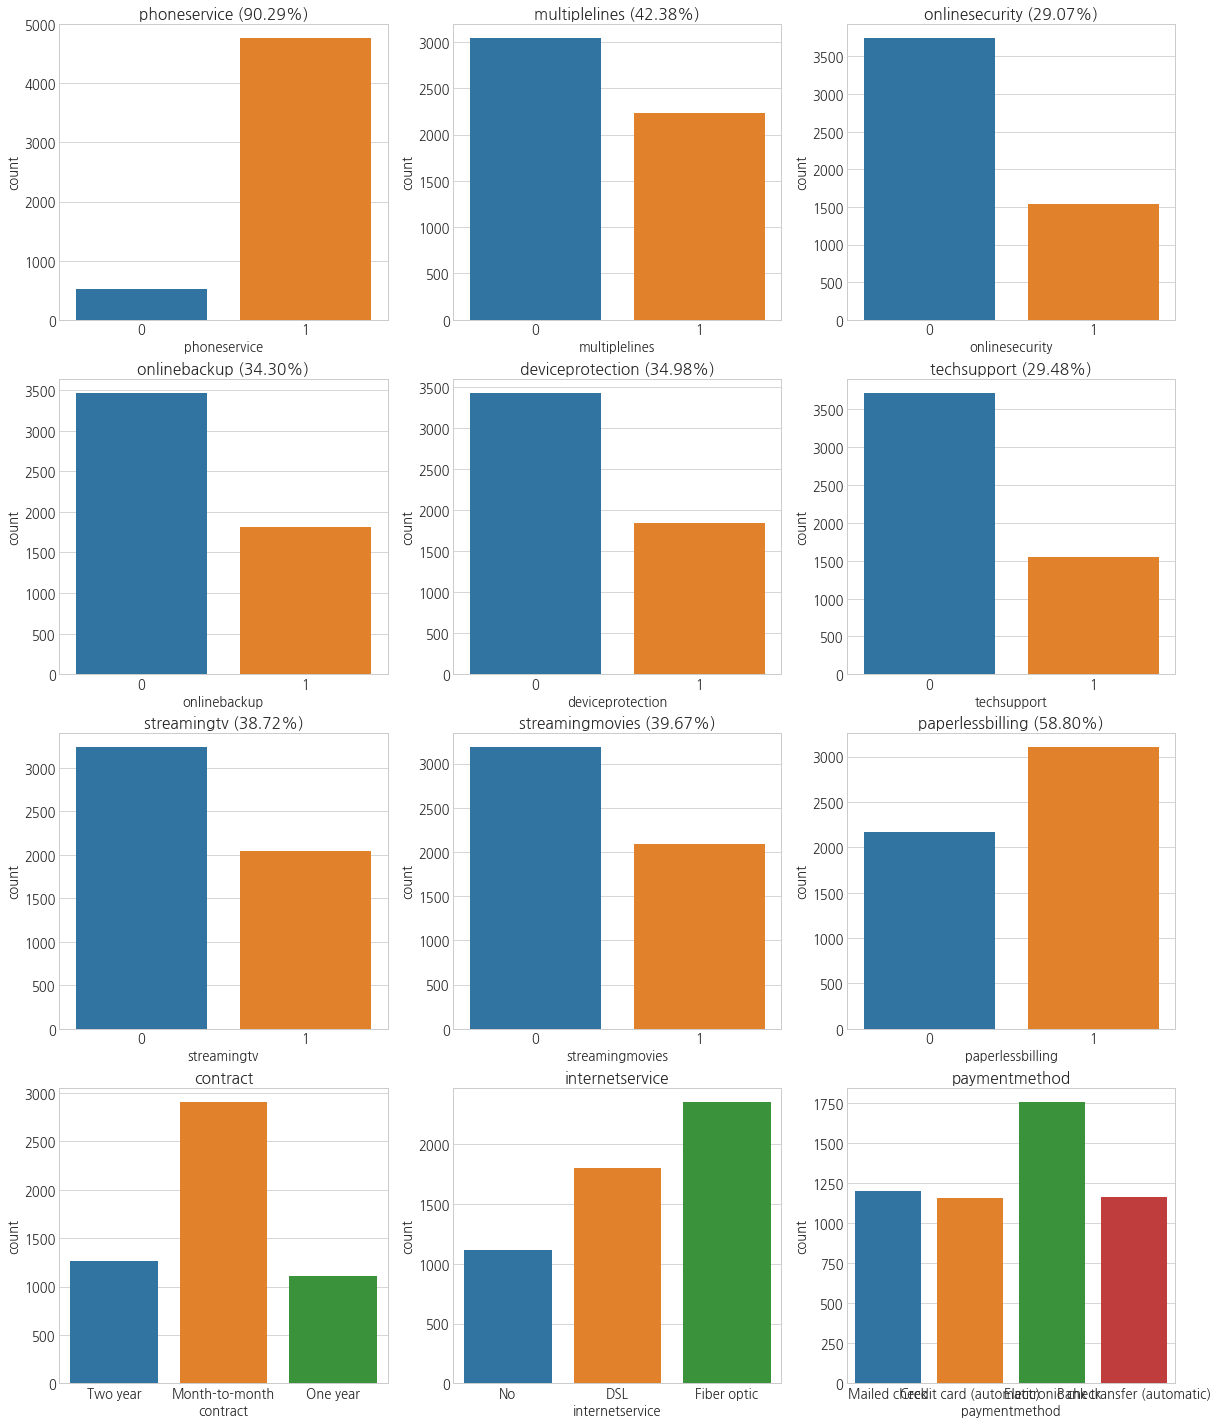

In [29]:
f, ax = plt.subplots(4, 3, figsize=(20, 25))
cplot(df_train, 'phoneservice', ax=ax[0,0])
cplot(df_train, 'multiplelines', ax=ax[0,1])
cplot(df_train, 'onlinesecurity', ax=ax[0,2])
cplot(df_train, 'onlinebackup', ax=ax[1,0])
cplot(df_train, 'deviceprotection', ax=ax[1,1])
cplot(df_train, 'techsupport', ax=ax[1,2])
cplot(df_train, 'streamingtv', ax=ax[2,0])
cplot(df_train, 'streamingmovies', ax=ax[2,1])
cplot(df_train, 'paperlessbilling', ax=ax[2,2])
sns.countplot('contract', data=df_train, ax=ax[3,0])
ax[3, 0].set_title('contract')
sns.countplot('internetservice', data=df_train, ax=ax[3,1])
ax[3, 1].set_title('internetservice')
sns.countplot('paymentmethod', data=df_train, ax=ax[3,2])
ax[3, 2].set_title('paymentmethod')

plt.show()

* 폰서비스를 사용하는 고객이 90% 이상이고, 그 외 서비스를 이용하는 고객들의 현황을 확인할 수 있다.
* 계약은 월별로 하는 고객이 가장 많았다.

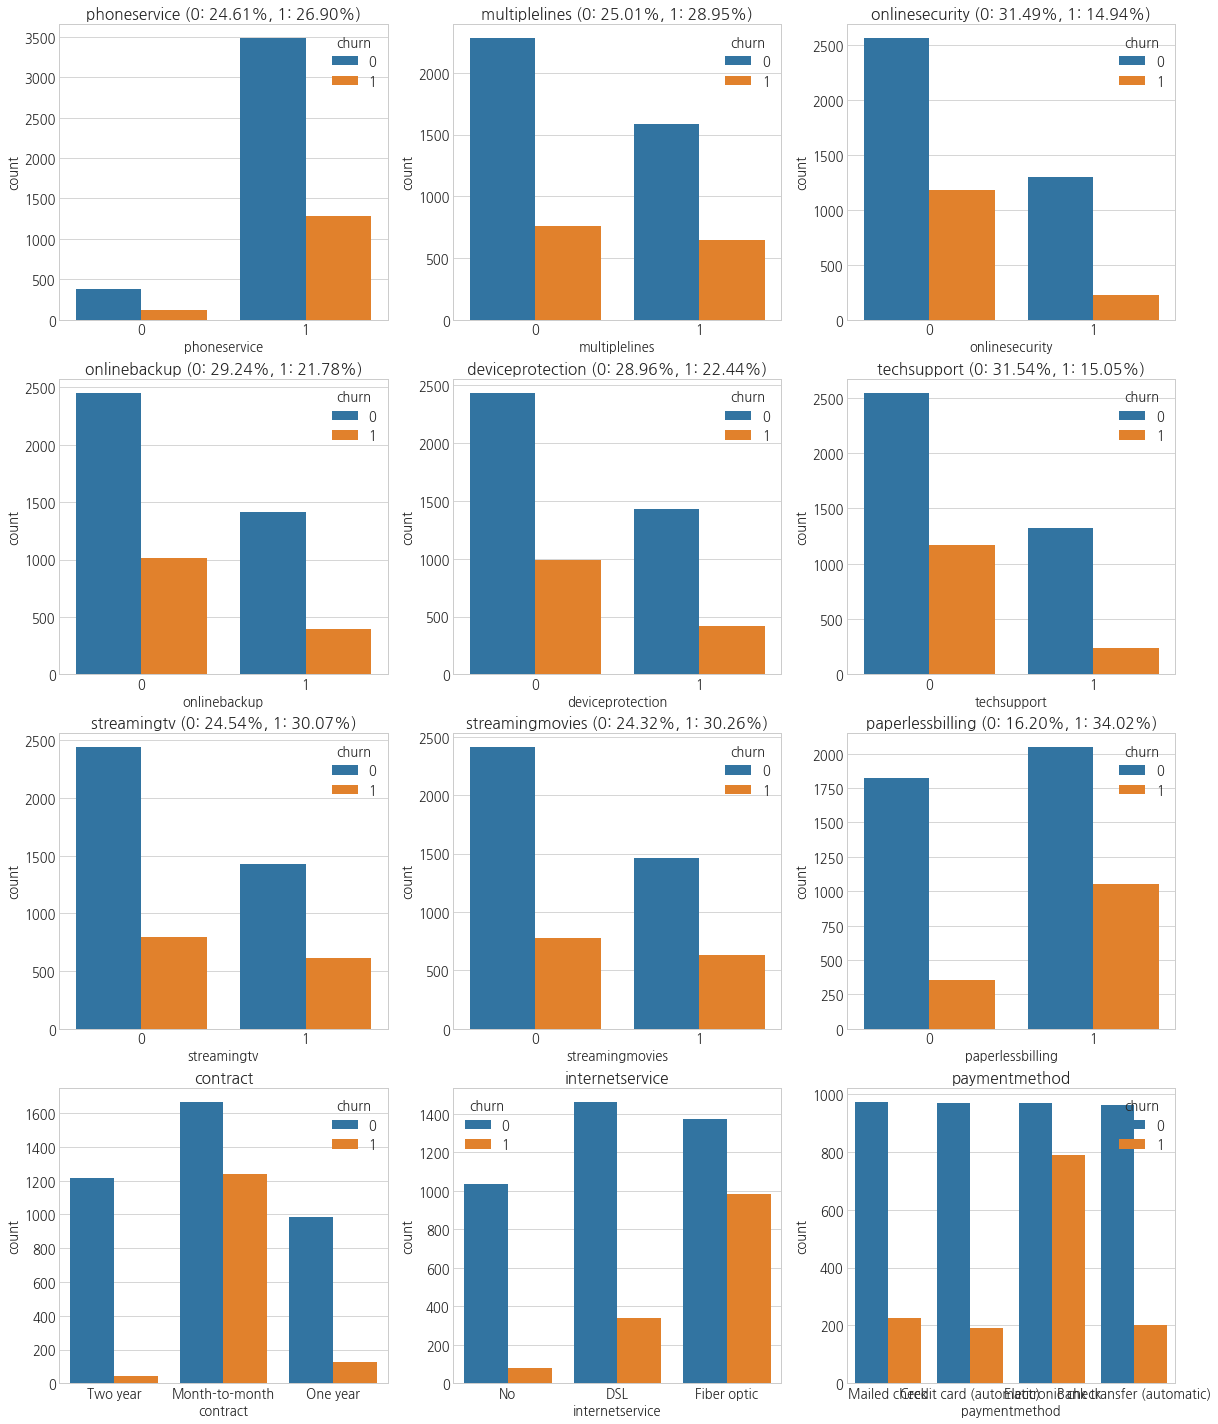

In [30]:
f, ax = plt.subplots(4, 3, figsize=(20, 25))
churnplot(df_train, 'phoneservice', ax=ax[0,0])
churnplot(df_train, 'multiplelines', ax=ax[0,1])
churnplot(df_train, 'onlinesecurity', ax=ax[0,2])
churnplot(df_train, 'onlinebackup', ax=ax[1,0])
churnplot(df_train, 'deviceprotection', ax=ax[1,1])
churnplot(df_train, 'techsupport', ax=ax[1,2])
churnplot(df_train, 'streamingtv', ax=ax[2,0])
churnplot(df_train, 'streamingmovies', ax=ax[2,1])
churnplot(df_train, 'paperlessbilling', ax=ax[2,2])
sns.countplot('contract', hue='churn', data=df_train, ax=ax[3,0])
ax[3, 0].set_title('contract')
sns.countplot('internetservice', hue='churn', data=df_train, ax=ax[3,1])
ax[3, 1].set_title('internetservice')
sns.countplot('paymentmethod', hue='churn', data=df_train, ax=ax[3,2])
ax[3, 2].set_title('paymentmethod')
plt.show()

* 특이한 점은, 통지서 없이 이용하는 고객의 churnrate가 높았다.
* 그리고 월별 계약자가 가장 많았는데, churnrate 또한 세 지불 형태 중 가장 높았다.
* paperlessbilling의 평균 차가 실제로 유의미한것인지 궁금한데, ttest를 통해 검증해보자.


In [31]:
from scipy import stats
lresult = stats.levene(df_train[df_train.paperlessbilling==0].churn, 
                       df_train[df_train.paperlessbilling==1].churn)
print('F: {:.3f}\np-value: {:.3f}'.format(lresult[0], lresult[1]))

F: 215.891
p-value: 0.000


* p값이 0.00미만으로 등분산성을 만족하지 않는다.

In [32]:
tresult = stats.ttest_ind(df_train[df_train.paperlessbilling == 0].churn,
                          df_train[df_train.paperlessbilling == 1].churn,
                          equal_var=False)
print('t: {:.3f}\np-value: {:.3f}'.format(tresult[0], tresult[1]))

t: -15.344
p-value: 0.000


* 두 평균 사이에 유의미한 차이가 있다는 것을 알 수 있다.

### 3.5 Charges
* monthlycharges, totalcharges
* 비용의 분포를 살펴보고,
* churn에 따른 비용 변화와
* 계약을 한 지 오래됐을수록 비용이 어떻게 변화하는지 함께 살펴보자.

In [33]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2930,5322-ZSMZY,Male,0,1,1,31,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,755.60,0
2190,5003-XZWWO,Male,0,1,0,71,1,1,DSL,0,1,1,1,1,1,Two year,0,Credit card (automatic),84.20,5956.85,0
1705,4918-FYJNT,Female,1,1,0,55,1,1,Fiber optic,0,1,1,1,0,0,Month-to-month,0,Electronic check,90.45,5044.80,0
1323,4565-NLZBV,Female,0,1,0,71,1,1,No,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),24.65,1710.15,0
6209,3417-TSCIC,Male,0,0,0,29,0,0,DSL,0,0,0,0,0,0,One year,1,Mailed check,24.85,788.05,0


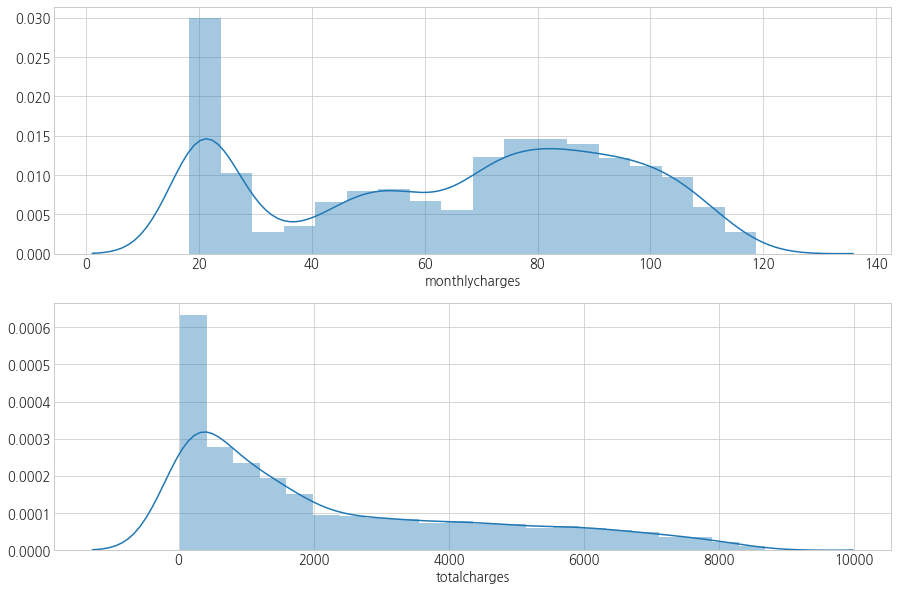

In [34]:
f, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.distplot(df_train.monthlycharges, ax=ax[0])
sns.distplot(df_train.totalcharges, ax=ax[1])
plt.show()

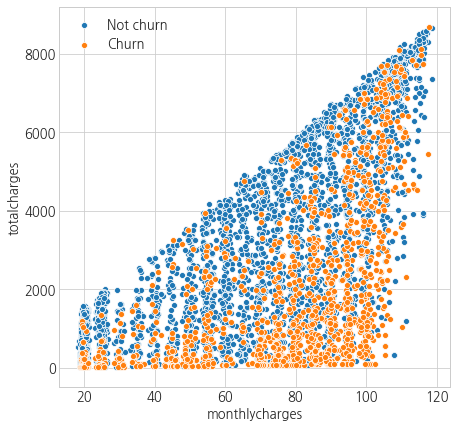

In [35]:
plt.figure(figsize=(7, 7))
sns.scatterplot(df_train[df_train.churn == 0].monthlycharges,
                df_train[df_train.churn == 0].totalcharges,
                label='Not churn')
sns.scatterplot(df_train[df_train.churn == 1].monthlycharges,
                df_train[df_train.churn == 1].totalcharges,
                label='Churn')
plt.show()

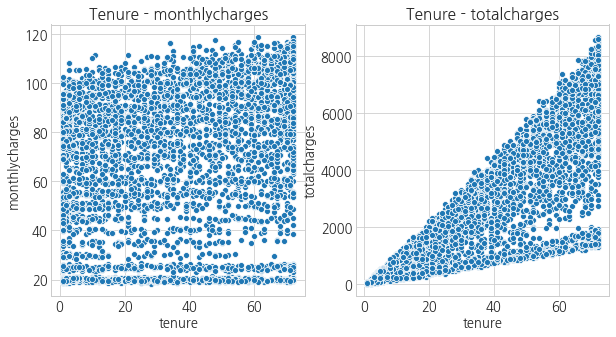

In [36]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(df_train.tenure, df_train.monthlycharges, ax=ax[0])
ax[0].set_title('Tenure - monthlycharges')
sns.scatterplot(df_train.tenure, df_train.totalcharges, ax=ax[1])
ax[1].set_title('Tenure - totalcharges')
plt.show()

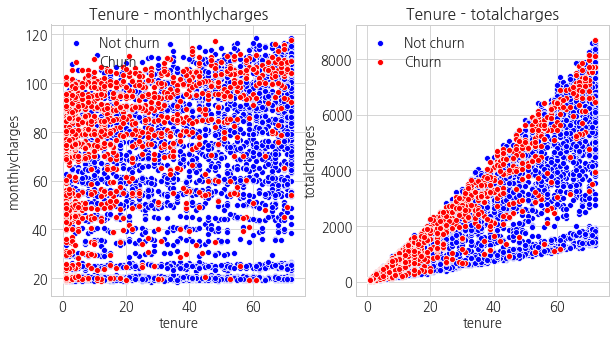

In [37]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(df_train[df_train.churn == 0].tenure,
                df_train[df_train.churn == 0].monthlycharges, ax=ax[0],
                color='b', label='Not churn')
sns.scatterplot(df_train[df_train.churn == 1].tenure,
                df_train[df_train.churn == 1].monthlycharges, ax=ax[0],
                color='r', label='Churn')
ax[0].set_title('Tenure - monthlycharges')
sns.scatterplot(df_train[df_train.churn == 0].tenure,
                df_train[df_train.churn == 0].totalcharges, ax=ax[1],
                color='b', label='Not churn')
sns.scatterplot(df_train[df_train.churn == 1].tenure,
                df_train[df_train.churn == 1].totalcharges, ax=ax[1],
                color='r', label='Churn')
ax[1].set_title('Tenure - totalcharges')
plt.show()

* 계약 기간이 길 수록 전체 요금은 증가한다. 당연한 결과다.
* 근데, 계약 기간이 길면 각종 혜택으로 인해 월 비용이 적을 줄 알았는데, 딱히 선형관계를 보이고있지는 않다.

In [38]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2930,5322-ZSMZY,Male,0,1,1,31,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,755.60,0
2190,5003-XZWWO,Male,0,1,0,71,1,1,DSL,0,1,1,1,1,1,Two year,0,Credit card (automatic),84.20,5956.85,0
1705,4918-FYJNT,Female,1,1,0,55,1,1,Fiber optic,0,1,1,1,0,0,Month-to-month,0,Electronic check,90.45,5044.80,0
1323,4565-NLZBV,Female,0,1,0,71,1,1,No,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),24.65,1710.15,0
6209,3417-TSCIC,Male,0,0,0,29,0,0,DSL,0,0,0,0,0,0,One year,1,Mailed check,24.85,788.05,0


### 3.6 Correlation
* 각 컬럼간 상관 관계를 살펴보자.

In [39]:
df_train.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2930,5322-ZSMZY,Male,0,1,1,31,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,755.60,0
2190,5003-XZWWO,Male,0,1,0,71,1,1,DSL,0,1,1,1,1,1,Two year,0,Credit card (automatic),84.20,5956.85,0


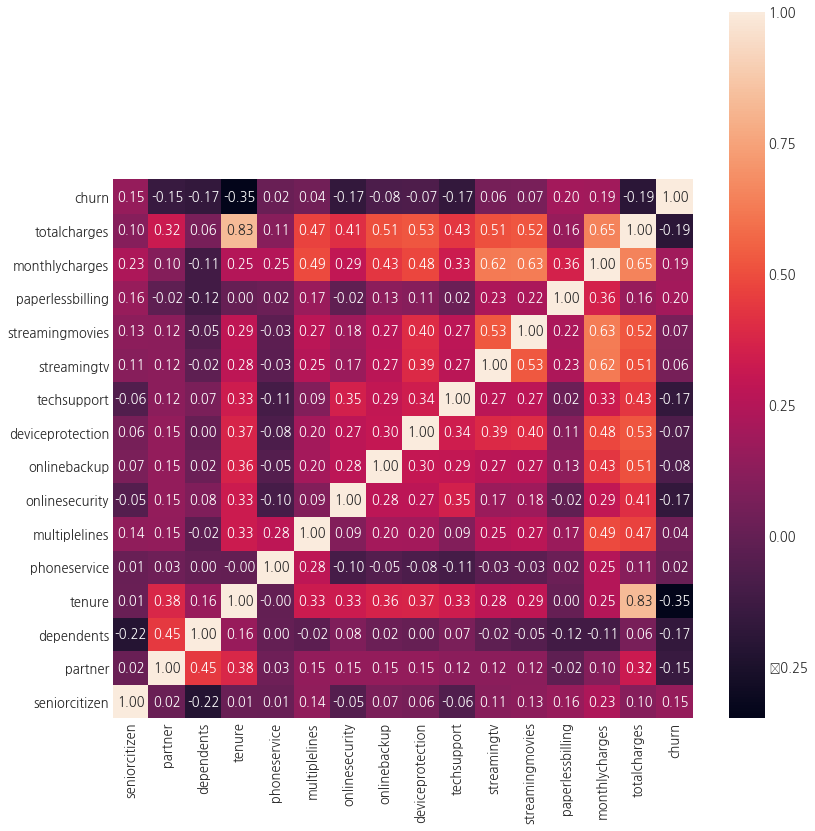

In [90]:
plt.figure(figsize=(13, 13))
sns.heatmap(df_train.corr(), annot=True, fmt='.2f')
plt.ylim([0,21])
plt.show()

* 통신사 서비스들(streamingmovies ~ multiplelines)이 비용과 양의 상관관계가 있다.
    * 또한, 서비스 이용 유무는 기간(tenure)과도 양의 상관관계를 보인다.
* 배우자 여부와 계약 기간이 양의 상관관계가 있다.
* 기간(tenure)과 churn 간 음의 상관관계가 존재한다.

## 4. Feature Engineering
* 일단 totalcharges와 monthlycharges, tenure를 스케일링해주자.
* 그 후 범주형 데이터를 원핫인코딩하자.

### 4.1 Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['tenure', 'monthlycharges', 'totalcharges']] =\
scaler.fit_transform(df_train[['tenure', 'monthlycharges', 'totalcharges']])

In [42]:
df_test[['tenure', 'monthlycharges', 'totalcharges']] =\
scaler.transform(df_test[['tenure', 'monthlycharges', 'totalcharges']])

In [43]:
df_train.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2930,5322-ZSMZY,Male,0,1,1,-0.066652,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,-1.316813,-0.685471,0
2190,5003-XZWWO,Male,0,1,0,1.563020,1,1,DSL,0,1,1,1,1,1,Two year,0,Credit card (automatic),0.632345,1.607448,0
1705,4918-FYJNT,Female,1,1,0,0.911152,1,1,Fiber optic,0,1,1,1,0,0,Month-to-month,0,Electronic check,0.840767,1.205380,0


### 4.2 One_hot_encoding
* 모델링을 위해 원핫인코딩을 진행하자.

In [101]:
df_train_dummy = pd.get_dummies(df_train.drop('customerid', axis=1))
df_test_dummy = pd.get_dummies(df_test.drop('customerid', axis=1))

In [99]:
df_train_dummy.head(2)

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,...,customerid_9992-UJOEL,customerid_9993-LHIEB,customerid_9995-HOTOH,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2930,0,1,1,-0.066652,1,1,0,0,0,0,0,0,0,-1.316813,-0.685471,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
2190,0,1,0,1.563020,1,1,0,1,1,1,1,1,0,0.632345,1.607448,...,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0


In [102]:
print(df_train_dummy.shape, df_test_dummy.shape)

(5274, 28) (1758, 28)


In [104]:
df_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 2930 to 3942
Data columns (total 28 columns):
seniorcitizen                              5274 non-null int64
partner                                    5274 non-null int64
dependents                                 5274 non-null int64
tenure                                     5274 non-null float64
phoneservice                               5274 non-null int64
multiplelines                              5274 non-null int64
onlinesecurity                             5274 non-null int64
onlinebackup                               5274 non-null int64
deviceprotection                           5274 non-null int64
techsupport                                5274 non-null int64
streamingtv                                5274 non-null int64
streamingmovies                            5274 non-null int64
paperlessbilling                           5274 non-null int64
monthlycharges                             5274 non-null float64
tota

In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 6649 to 3083
Data columns (total 21 columns):
customerid          1758 non-null object
gender              1758 non-null category
seniorcitizen       1758 non-null int64
partner             1758 non-null int64
dependents          1758 non-null int64
tenure              1758 non-null float64
phoneservice        1758 non-null int64
multiplelines       1758 non-null int64
internetservice     1758 non-null category
onlinesecurity      1758 non-null int64
onlinebackup        1758 non-null int64
deviceprotection    1758 non-null int64
techsupport         1758 non-null int64
streamingtv         1758 non-null int64
streamingmovies     1758 non-null int64
contract            1758 non-null category
paperlessbilling    1758 non-null int64
paymentmethod       1758 non-null category
monthlycharges      1758 non-null float64
totalcharges        1758 non-null float64
churn               1758 non-null int64
dtypes: category(4), float64(3)

## 5. Modeling
* LogisticRegressor, Randomforest

In [109]:
X_train = df_train_dummy.drop(['churn'], axis=1)
X_test = df_test_dummy.drop(['churn'], axis=1)
y_train = df_train_dummy.churn
y_test = df_test_dummy.churn

In [110]:
X_train.head(2)

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,monthlycharges,totalcharges,gender_Female,gender_Male,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
2930,0,1,1,-0.066652,1,1,0,0,0,0,0,0,0,-1.316813,-0.685471,0,1,0,0,1,0,0,1,0,0,0,1
2190,0,1,0,1.563020,1,1,0,1,1,1,1,1,0,0.632345,1.607448,0,1,1,0,0,0,0,1,0,1,0,0


### 4.3 Feature selection
* 데이터에 비해 피처가 많아서 오캄의 면도날을 조심해야한다.
* 사실, 피처 수가 몇백개 이상으로 많지는 않다.
    * 그래서 직접 불필요하다고 판단되는 피처를 탈락시켜도 되지만,
    * 이전에 한 번도 해보지 않은 모델을 통한 feature selection을 진행해보겠다.
        * 공부도 되고!

In [178]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
fi_ = rf.feature_importances_
fi_

array([0.021033  , 0.0223428 , 0.0199456 , 0.15668154, 0.00650703,
       0.0200436 , 0.02004547, 0.02097201, 0.01834863, 0.02079345,
       0.01746015, 0.01827829, 0.02578049, 0.17157291, 0.17833495,
       0.01718999, 0.01689488, 0.01095433, 0.03373808, 0.01448037,
       0.06504644, 0.01237822, 0.0234443 , 0.01226924, 0.01225557,
       0.03136751, 0.01184115])

In [182]:
cols = X_train.columns
cols

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice',
       'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling',
       'monthlycharges', 'totalcharges', 'gender_Female', 'gender_Male',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

In [229]:
col_fi = {c: f for c, f in zip(cols, fi_)}
col_fi = sorted(col_fi.items(), key=lambda x: x[1], reverse=True)
cols = [i[0] for i in col_fi]
fi_ = [i[1] for i in col_fi]

<BarContainer object of 27 artists>

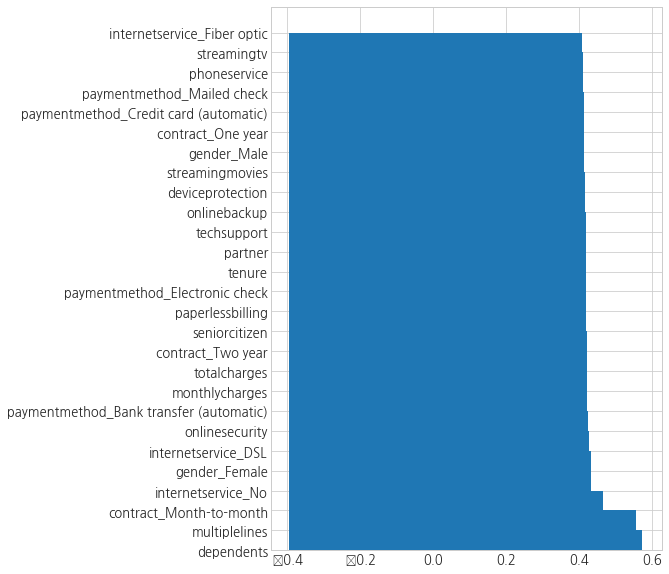

In [230]:
plt.figure(figsize=(7, 10))
plt.bar( fi_, cols)

dict_values([0.021033003989735746, 0.022342801718652994, 0.019945603556300946, 0.15668153707433327, 0.006507028252661091, 0.020043603526949658, 0.020045469486490775, 0.020972010875202635, 0.018348633289674586, 0.020793449188547197, 0.017460145928969373, 0.01827829075341787, 0.025780490180701783, 0.17157290611928536, 0.1783349474046601, 0.01718999393703253, 0.016894881098398668, 0.010954326179692268, 0.033738075355617396, 0.014480366719936945, 0.06504644112110573, 0.012378218829797689, 0.02344430136794762, 0.012269243859757405, 0.012255573839607944, 0.0313675089582562, 0.011841147387266198])

dict_keys(['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'monthlycharges', 'totalcharges', 'gender_Female', 'gender_Male', 'internetservice_DSL', 'internetservice_Fiber optic', 'internetservice_No', 'contract_Month-to-month', 'contract_One year', 'contract_Two year', 'paymentmethod_Bank transfer (automatic)', 'paymentmethod_Credit card (automatic)', 'paymentmethod_Electronic check', 'paymentmethod_Mailed check'])

In [119]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_l1.shape: {}'.format(X_train_l1.shape))

X_train.shape: (5274, 27)
X_train_l1.shape: (5274, 14)
